#Notebok that produces a Grouped Bar Graph using Index Files.

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams["figure.dpi"] = 360 #Quality of the graphs
import os
import numpy as np
import datetime

In [3]:
form_list=['S-1','S-3','S-4','F-1','F-3','F-4','D','C','1-A']

In [4]:
#Pulls data from the idx master file.
os.chdir('J:/Oea/bresler/David/Index')

years = [2010,2018]
quarters = [1,2,3,4]
dfmerge = pd.DataFrame()
for years in years:
    for quarter in quarters:
        frame = pd.read_csv('Q' + str(quarter) + '_' + str(years) +'.idx',error_bad_lines = False, sep = '|',  encoding='latin-1')
        frame['Company Name'] = frame['Company Name'].replace({',':'', '\.':'', '"':''}, regex=True)
        dfmerge = dfmerge.append(frame, ignore_index=True) 
        dfmerge['Company Name'] = dfmerge['Company Name'].astype(str)
        dfmerge['Company Name'] = dfmerge['Company Name'].map(lambda x: x.strip())
        dfmerge['CIK'] = dfmerge['CIK'].astype(str)
        dfmerge['CIK'] = dfmerge['CIK'].map(lambda x: x.strip())
        dfmerge = dfmerge[(dfmerge['Company Name'] != 'blank')]
        dfmerge['CIK'] = dfmerge['CIK'].map(lambda x: x.lstrip('0'))
        dfmerge['CIK'] = dfmerge['CIK'].astype(int)
        dfmerge['Date Filed'] = dfmerge['Date Filed'].astype(str)
        dfmerge['Date Filed'] = dfmerge['Date Filed'].map(lambda x: x.strip())
        dfmerge['Filename'] = dfmerge['Filename'].astype(str)
        dfmerge['Filename'] = dfmerge['Filename'].map(lambda x: x.lstrip('edgar/data/'))
        dfmerge['Filename'] = dfmerge['Filename'].map(lambda x: x.rstrip('.txt'))
        dfmerge['Filename'] = dfmerge['Filename'].str.replace(r'^[\d]*\/', '')

In [5]:
dfmerge

,CIK,Company Name,Form Type,Date Filed,Filename
0,1000032,BINCH JAMES G,4,2010-03-02,0001181431-10-013095
1,1000045,NICHOLAS FINANCIAL INC,10-Q/A,2010-03-23,0001193125-10-064525
2,1000045,NICHOLAS FINANCIAL INC,10-Q,2010-02-16,0001193125-10-031666
3,1000045,NICHOLAS FINANCIAL INC,8-K,2010-01-12,0001193125-10-005109
4,1000045,NICHOLAS FINANCIAL INC,8-K,2010-02-02,0001193125-10-019005
5,1000045,NICHOLAS FINANCIAL INC,CORRESP,2010-02-12,0001193125-10-030782
6,1000045,NICHOLAS FINANCIAL INC,SC 13G/A,2010-02-08,0000950123-10-009863
7,1000045,NICHOLAS FINANCIAL INC,SC 13G/A,2010-02-16,0000950123-10-013291
8,1000045,NICHOLAS FINANCIAL INC,SC 13G/A,2010-02-16,0000950123-10-013348
9,1000045,NICHOLAS FINANCIAL INC,UPLOAD,2010-01-29,0000000000-10-005950


In [6]:
dfmerge['Date Filed'] = pd.to_datetime(dfmerge['Date Filed'])

In [7]:
df_filtered=dfmerge[dfmerge['Form Type'].isin(form_list)]

In [8]:
grouped_counts = df_filtered.groupby(['Form Type', 'Date Filed'])['Form Type'].value_counts().reset_index(name= 'Counts')

In [9]:
grouped_counts

,Form Type,Date Filed,level_2,Counts
0,1-A,2010-02-23,1-A,1
1,1-A,2010-03-01,1-A,1
2,1-A,2010-03-10,1-A,1
3,1-A,2010-03-11,1-A,1
4,1-A,2010-03-17,1-A,1
5,1-A,2010-04-28,1-A,2
6,1-A,2010-05-19,1-A,1
7,1-A,2010-05-28,1-A,1
8,1-A,2010-06-14,1-A,1
9,1-A,2010-06-16,1-A,1


In [10]:
grouped_counts.drop(['level_2'], axis =1 , inplace=True)

In [11]:
dfyear = grouped_counts

In [12]:
dfyear['year'] = pd.DatetimeIndex(dfyear['Date Filed']).year
dfyear['month'] = pd.DatetimeIndex(grouped_counts['Date Filed']).month

In [13]:
dfyear

,Form Type,Date Filed,Counts,year,month
0,1-A,2010-02-23,1,2010,2
1,1-A,2010-03-01,1,2010,3
2,1-A,2010-03-10,1,2010,3
3,1-A,2010-03-11,1,2010,3
4,1-A,2010-03-17,1,2010,3
5,1-A,2010-04-28,2,2010,4
6,1-A,2010-05-19,1,2010,5
7,1-A,2010-05-28,1,2010,5
8,1-A,2010-06-14,1,2010,6
9,1-A,2010-06-16,1,2010,6


In [14]:
dfyear = dfyear.groupby(['year', 'Form Type'])['Counts'].agg([sum]).unstack()

In [15]:
dfyear.T.reset_index(drop=True).T # This hardcoded part is needed for formatting purposes for the graph.
dfyear.columns = ['1-A', 'C', 'D', 'F-1', 'F-3', 'F-4', 'S-1', 'S-3', 'S-4']

In [16]:
dfyeart = dfyear.T

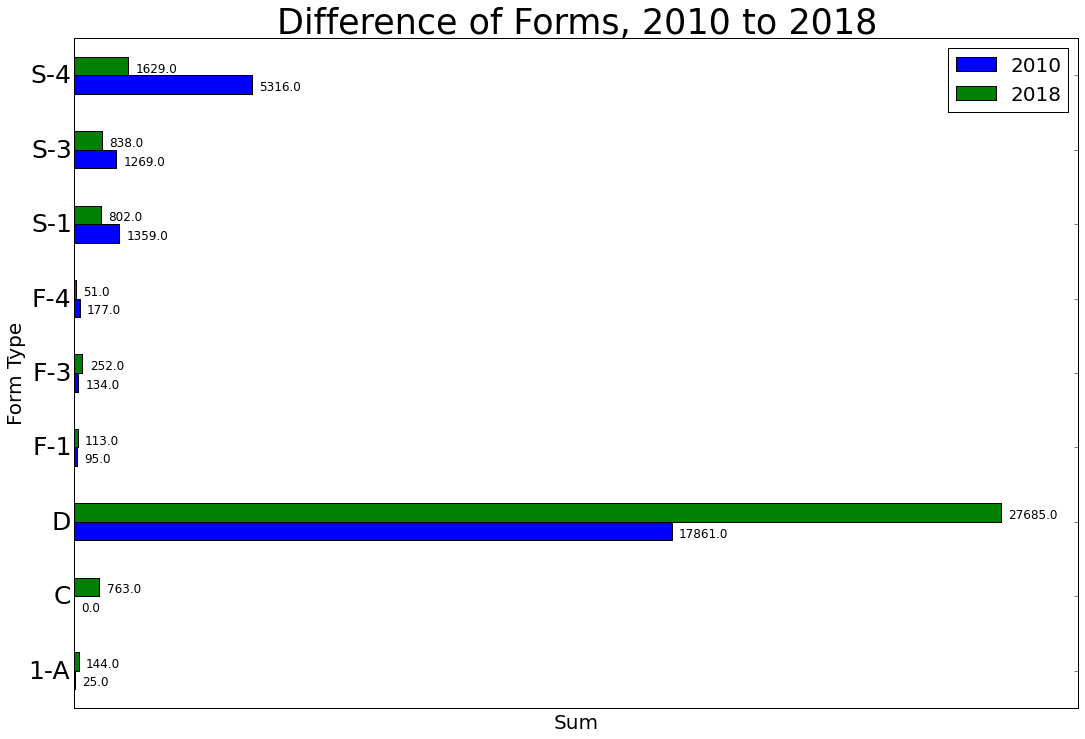

In [17]:
fig, ax = plt.subplots(figsize=(18,12))
dfyeart.plot(kind = 'barh',ax=ax, linewidth=1, fontsize=25)

#plt.tight_layout()
plt.legend(loc=1, prop={'size': 20})
plt.title('Difference of Forms, 2010 to 2018', fontsize=35)
plt.xlabel('Sum', fontsize=20)
plt.ylabel('Form Type', fontsize = 20);

ax.grid(False) #remove grid
ax.set_xticks([]) #set empty xticks

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+250, i.get_y()+0.05, \
            str((i.get_width())), fontsize=12,
color='black')
plt.show();